# Strava Activities in Italy

In [13]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('activities.csv', decimal=',')
data = data.dropna(thresh=len(data) - 2, axis=1)
data.columns

Index(['ID attività', 'Data dell’attività', 'Nome attività', 'Tipo attività',
       'Tempo complessivo', 'Distanza', 'Spostamenti vari', 'Nome del file',
       'Peso dell’atleta', 'Tempo in movimento', 'Distanza.1',
       'Velocità massima', 'Dislivello complessivo', 'Dislivello minimo',
       'Dislivello massimo', 'Pendenza massima', 'Pendenza media'],
      dtype='object')

In [14]:

print('Shape of data: ', data.shape)
data.head()

Shape of data:  (44, 17)


,ID attività,Data dell’attività,Nome attività,Tipo attività,Tempo complessivo,Distanza,Spostamenti vari,Nome del file,Peso dell’atleta,Tempo in movimento,Distanza.1,Velocità massima,Dislivello complessivo,Dislivello minimo,Dislivello massimo,Pendenza massima,Pendenza media
0,1537701862,"28 apr 2018, 19:39:53",Giro pomeridiano,Ciclismo,11974,53.82,False,activities/1537701862.gpx,0.0,9417.0,53824.30078125,14.399999618530273,693.3389282226562,1516.9000244140625,2134.800048828125,14.600000381469727,0.0
1,1541822998,"30 apr 2018, 21:38:51",Primo giro del nord,Ciclismo,9682,52.27,False,activities/1541822998.gpx,0.0,8135.0,52278.6015625,12.699999809265137,257.2567138671875,1510.800048828125,1667.199951171875,10.699999809265137,-0.00019128285930491984
2,1558764452,"08 mag 2018, 16:07:41",Giro mattutino,Ciclismo,11047,58.89,False,activities/1558764452.gpx,0.0,10466.0,58892.80078125,18.299999237060547,975.0481567382812,1516.9000244140625,2439.39990234375,20.799999237060547,0.0005094001535326242
3,1565541423,"11 mag 2018, 19:11:52",Giro pomeridiano,Ciclismo,4219,23.24,False,activities/1565541423.gpx,0.0,3465.0,23239.80078125,11.100000381469727,103.75849914550781,1520.800048828125,1579.0,6.599999904632568,0.0
4,1645641516,"18 giu 2018, 00:16:53",Sunday funday,Corsa,3463,10.66,False,activities/1645641516.gpx,0.0,3188.0,10661.2998046875,5.5,29.817325592041016,1512.699951171875,1529.300048828125,10.699999809265137,0.006565803196281195


In [40]:
#Sorting by activity type and fixing by dtypes
data['Dislivello complessivo'] = data['Dislivello complessivo'].astype('float64')
run = data[data['Tipo attività'] == 'Corsa']
cycle = data[data['Tipo attività'] == 'Ciclismo']


Text(0.5, 1.0, 'Running Distances')

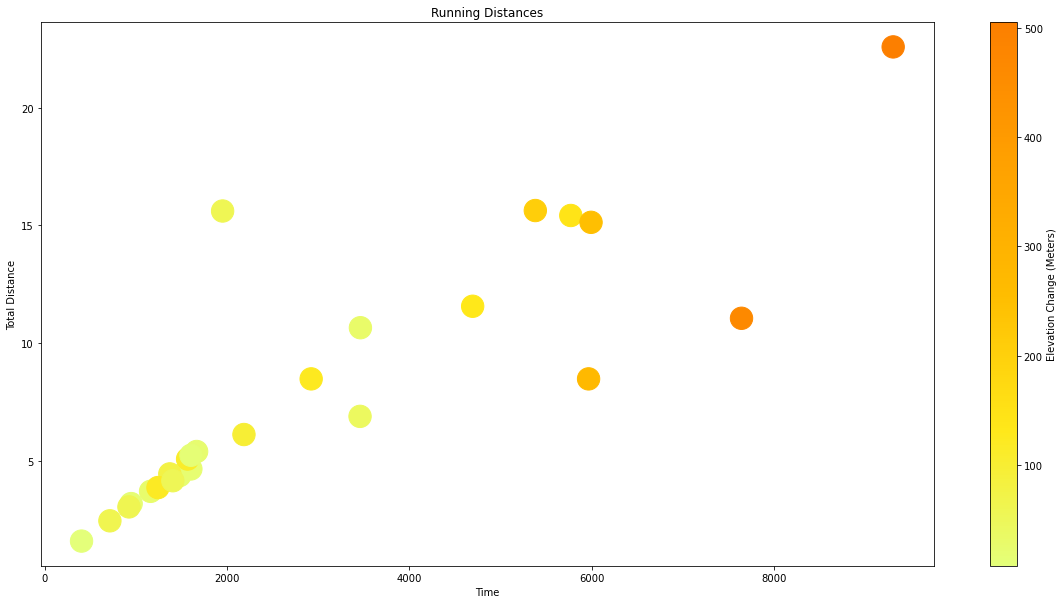

In [45]:
#Clearly we need to turn this into English, but we can have some fun none the less
cm =plt.cm.get_cmap('Wistia')

fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=run['Tempo complessivo'], y=run['Distanza'], c=run['Dislivello complessivo'], s=500, cmap=cm)
fig.colorbar(scatter, label='Elevation Change (Meters)')
ax.set_xlabel('Time')
ax.set_ylabel('Total Distance')
ax.set_title('Running Distances')

Text(0.5, 1.0, 'Cycling Distances')

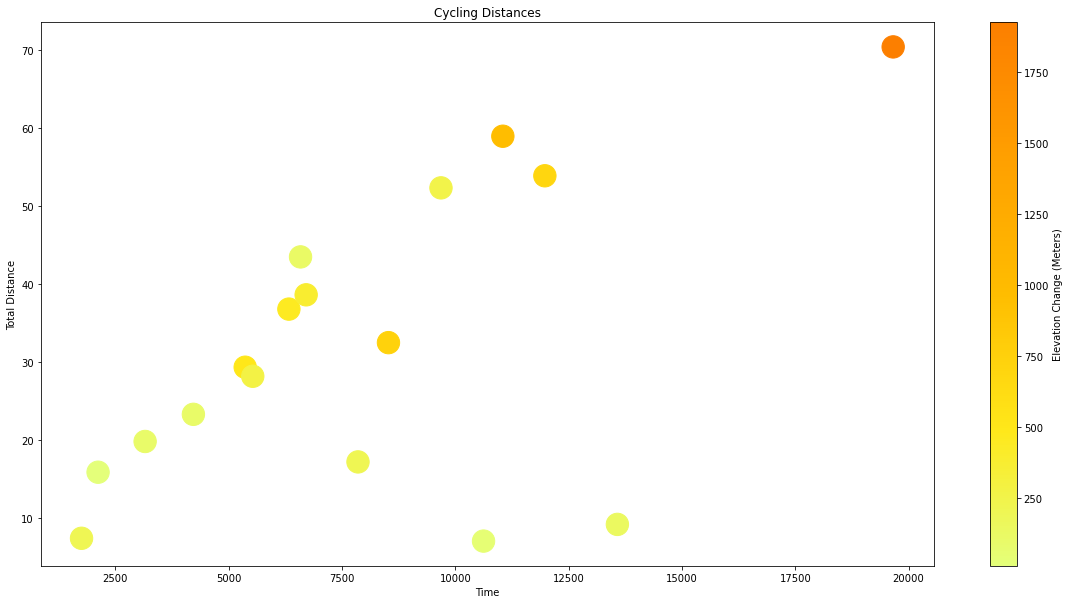

In [46]:
#For Cycling
cm =plt.cm.get_cmap('Wistia')

fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=cycle['Tempo complessivo'], y=cycle['Distanza'], c=cycle['Dislivello complessivo'], s=500, cmap=cm)
fig.colorbar(scatter, label='Elevation Change (Meters)')
ax.set_xlabel('Time')
ax.set_ylabel('Total Distance')
ax.set_title('Cycling Distances')